# <center>`Linear Regression using Sklearn`</center>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


TV, raddio & newspaper are the features.  
sales is the target column.

#### Simple Linear Regression

y = mx + c  
x - single feature  
parameters - m (one coefficient) & c (one intercept)  

In [4]:
X = df['TV']
y = df['sales']

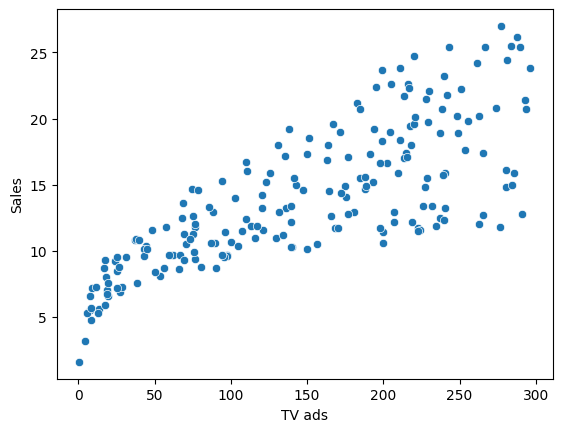

In [5]:
sns.scatterplot(x=X, y=y)

plt.xlabel("TV ads")
plt.ylabel("Sales")

plt.show()

In [7]:
X.shape

(200,)

In [8]:
X = X.values.reshape(-1, 1)
X.shape

(200, 1)

In [9]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [10]:
print("The coefficient is", lr.coef_)
print("The intercept is", lr.intercept_)

The coefficient is [0.04753664]
The intercept is 7.032593549127695


<b>The Sales is related to TV ads by the equation:</b>  
Sales = 0.0475*TV + 7.0326

<b>Que:</b> What will the sales if I spend 500 dollars in TV ads?

In [11]:
sales = 0.0475*500 + 7.0326

print("The Sales will be", sales, "if I spend 500 dollars on TV ads")

The Sales will be 30.782600000000002 if I spend 500 dollars on TV ads


In [12]:
lr.predict( [[500]] )

array([30.80091377])

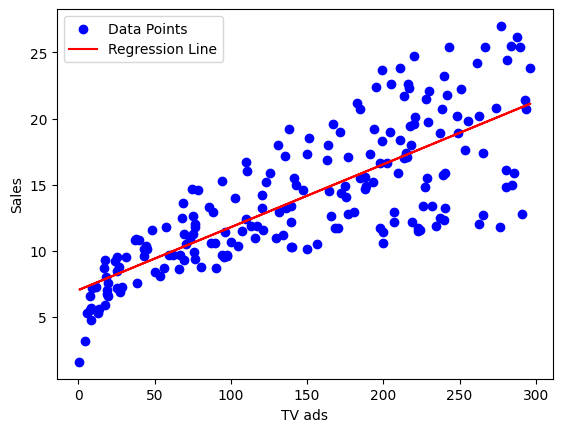

In [13]:
y_pred = lr.predict(X)

plt.scatter(x=X, y=y, c='blue', label="Data Points")
plt.plot(X, y_pred, c='red', label="Regression Line")

plt.xlabel("TV ads")
plt.ylabel("Sales")
plt.legend()

plt.show()

### Evaluate this model

In [14]:
r2_score(y, y_pred)

0.611875050850071

0.6118 r2 score means the feature TV ads can explain 61.18% of variance in the target i.e. Sales.

## Multiple Linear Regression

In [15]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [16]:
X = df.drop(columns=['Unnamed: 0', 'sales'])
y = df['sales']
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [17]:
lr = LinearRegression()
lr.fit(X, y)

print("The coefficients are", lr.coef_)
print("The intercept is", lr.intercept_)

The coefficients are [ 0.04576465  0.18853002 -0.00103749]
The intercept is 2.938889369459412


In [18]:
lr.predict( [[200, 40, 20]] )

array([19.61226928])

In [19]:
y_pred = lr.predict(X)
r2_score(y, y_pred)

0.8972106381789522

0.8972 r2 score means the features TV ads, radio & newspaper can explain 89.72% of variance in the target i.e. Sales.

## Evaluation of Linear Regression

In [20]:
mean_squared_error(y, y_pred)

2.784126314510936

In [21]:
mean_squared_error(y, y_pred, squared=False)  # Root mean squared error

1.6685701407225697

In [22]:
# absolute difference between y and y_pred
mean_absolute_error(y, y_pred)

1.2520112296870685